# Soybean dataset

In [100]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axis as axis
import time

import sklearn as skl
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

data = arff.loadarff('data/dataset_42_soybean.arff')
df = pd.DataFrame(data[0])

num_entries = df.shape[0]
num_attributes = df.shape[1]

#Create dictionary with keys = attributes and values = possible values of that attribute 
attributes = {}
for col in df.columns:
    attributes[col] = np.unique(df[col])


{b'2-4-d-injury': 16, b'alternarialeaf-spot': 91, b'anthracnose': 44, b'bacterial-blight': 20, b'bacterial-pustule': 20, b'brown-spot': 92, b'brown-stem-rot': 44, b'charcoal-rot': 20, b'cyst-nematode': 14, b'diaporthe-pod-&-stem-blight': 15, b'diaporthe-stem-canker': 20, b'downy-mildew': 20, b'frog-eye-leaf-spot': 91, b'herbicide-injury': 8, b'phyllosticta-leaf-spot': 20, b'phytophthora-rot': 88, b'powdery-mildew': 20, b'purple-seed-stain': 20, b'rhizoctonia-root-rot': 20}


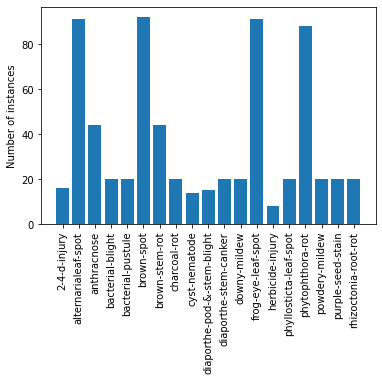

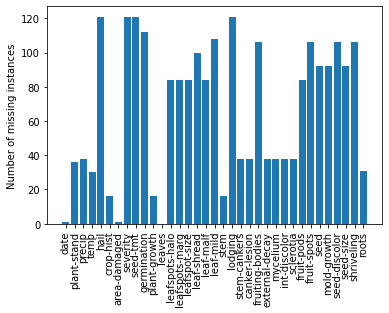

In [101]:
#Plot some information about the dataset

count_classes = {}
for c in attributes["class"]:
    df_c = df["class"] == c
    count_classes[c] = np.sum(df_c)
    
print(count_classes)

plt.figure(0)
plt.bar(count_classes.keys(), count_classes.values())
plt.ylabel("Number of instances")

plt.xticks(rotation="vertical")

plt.savefig("ex1-plots/soybeans/class_count")
plt.figure(1)

count_missing = {}
for atr in attributes.keys():
    if(atr != 'class'):
        count_missing[atr] = np.sum(df[atr] == b"?")
  
plt.bar(count_missing.keys(), count_missing.values())
plt.xticks(rotation="vertical")
plt.ylabel("Number of missing instances")

#ax = plt.figure().gca()
#ax.xaxis.get_major_locator().set_params(integer=True)

plt.savefig("ex1-plots/soybeans/missing_count")

## Preprocessing NOT DONE

In [98]:
# Turn into normalized, numerical data
# Missing value = 0

# Attempt at treating attributes differently
# The ordinal labels have to be sorted by hand...
categories_ = [
[b'?', b'april', b'may', b'june', b'july', b'august', b'september', b'october'],
[b'?', b'lt-normal', b'normal'], 
[b'?', b'lt-norm', b'norm', b'gt-norm'],
[b'?', b'lt-norm', b'norm', b'gt-norm'],
[b'?', b'no', b'yes'], #5
[b'?', b'diff-lst-year', b'same-lst-yr', b'same-lst-two-yrs', b'same-lst-sev-yrs'],
[b'?', b'scattered', b'low-areas', b'upper-areas', b'whole-field'], #not ordinal
[b'?', b'minor', b'pot-severe', b'severe'],
[b'?', b'none' , b'fungicide' , b'other'], #not ordinal
[b'?', b'90-100',b'80-89',b'lt-80'], #10
[b'?', b'norm', b'abnorm'],
[b'?', b'norm', b'abnorm'],
[b'?', b'absent', b'no-yellow-halos', b'yellow-halos'], #not ordinal
[b'?', b'dna', b'no-w-s-marg', b'w-s-marg'], #not ordinal
[b'?', b'dna', b'lt-1/8', b'gt-1/8'], #15 not ordinal
attributes['leaf-shread'],
attributes['leaf-malf'],
[b'?', b'absent', b'lower-surf', b'upper-surf'], #not ordinal
[b'?', b'norm', b'abnorm'],
[b'?', b'no', b'yes'],    #20
[b'?', b'absent',b'below-soil',b'above-soil',b'above-sec-nde'],
[b'?', b'dna',b'tan', b'brown',b'dk-brown-blk'],
[b'?', b'absent', b'present'],
[b'?', b'absent', b'watery', b'firm-and-dry'], #not ordinal    
[b'?', b'absent', b'present'],    #25
attributes['int-discolor'], #not ordinal
[b'?', b'absent', b'present'],
attributes['fruit-pods'], #not ordinal
attributes['fruit-spots'], #not ordinal
[b'?', b'norm', b'abnorm'], #30
[b'?', b'absent', b'present'],
[b'?', b'absent', b'present'],
[b'?', b'lt-norm', b'norm'],
[b'?', b'absent', b'present'],
[b'?', b'norm',b'rotted',b'galls-cysts'], #35 not ordinal
[b'diaporthe-stem-canker', b'charcoal-rot', b'rhizoctonia-root-rot', b'phytophthora-rot', b'brown-stem-rot', b'powdery-mildew', b'downy-mildew', b'brown-spot', b'bacterial-blight', b'bacterial-pustule', b'purple-seed-stain', b'anthracnose', b'phyllosticta-leaf-spot', b'alternarialeaf-spot', b'frog-eye-leaf-spot', b'diaporthe-pod-&-stem-blight', b'cyst-nematode', b'2-4-d-injury', b'herbicide-injury']
]

oe = skl.preprocessing.OrdinalEncoder(categories = categories_)
oe.fit(df)
df_processed =  oe.transform(df)


hot_encoder = skl.preprocessing.OneHotEncoder()



# Split into training and test-set


#Training set: Remove entry if >some value n of missing values


#For those with less than n missing values, 

         date plant-stand      precip     temp    hail            crop-hist  \
0  b'october'   b'normal'  b'gt-norm'  b'norm'  b'yes'       b'same-lst-yr'   
1   b'august'   b'normal'  b'gt-norm'  b'norm'  b'yes'  b'same-lst-two-yrs'   
2     b'july'   b'normal'  b'gt-norm'  b'norm'  b'yes'       b'same-lst-yr'   
3     b'july'   b'normal'  b'gt-norm'  b'norm'  b'yes'       b'same-lst-yr'   
4  b'october'   b'normal'  b'gt-norm'  b'norm'  b'yes'  b'same-lst-two-yrs'   

   area-damaged       severity      seed-tmt germination  ...  sclerotia  \
0  b'low-areas'  b'pot-severe'       b'none'   b'90-100'  ...  b'absent'   
1  b'scattered'      b'severe'  b'fungicide'    b'80-89'  ...  b'absent'   
2  b'scattered'      b'severe'  b'fungicide'    b'lt-80'  ...  b'absent'   
3  b'scattered'      b'severe'       b'none'    b'80-89'  ...  b'absent'   
4  b'scattered'  b'pot-severe'       b'none'    b'lt-80'  ...  b'absent'   

  fruit-pods fruit-spots     seed mold-growth seed-discolor seed-siz

## kNN

In [ ]:
#Calculate kNN

In [ ]:
#Plot kNN

## LDA

In [ ]:
#Calculate LDA

In [ ]:
#Plot LDA

## Random Forest

In [ ]:
#Calculate Random Forest

In [4]:
#Plot Random Forest